<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [31]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [6]:
df['ConvertedComp'].fillna(df['ConvertedComp'].mean(),inplace= True)
df['ConvertedComp'].isnull().sum()

0

In [7]:
df['ConvertedComp']

0         61000.00000
1         95179.00000
2         90000.00000
3        455352.00000
4         65277.00000
             ...     
11393    130000.00000
11394     19880.00000
11395    105000.00000
11396     80371.00000
11397    131596.73162
Name: ConvertedComp, Length: 11398, dtype: float64

In [8]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import gaussian_kde

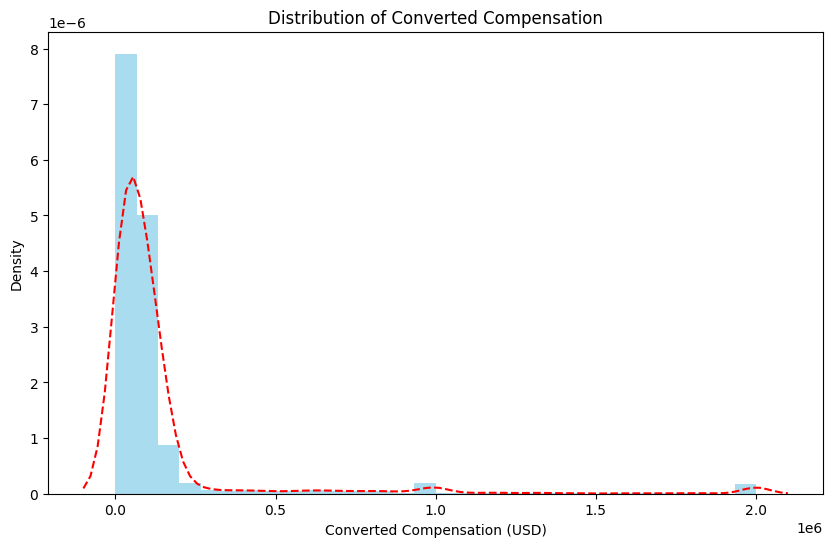

In [9]:
# Plot the distribution curve
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, density=True, color='skyblue', alpha=0.7)

# Add a kernel density estimation (KDE) curve
density = gaussian_kde(df['ConvertedComp'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, density(x), color='red', linestyle='--')

# Add labels and title
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.title('Distribution of Converted Compensation')

# Show the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


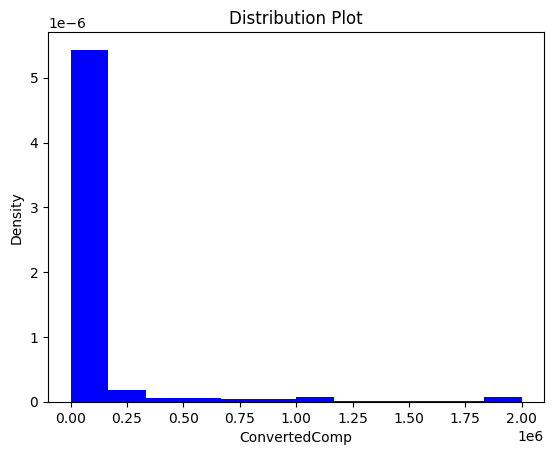

In [10]:
# your code goes here
# Create a histogram
plt.hist(df['ConvertedComp'], bins=12, density=True, color='blue')

# Add a title and labels
plt.title('Distribution Plot')
plt.xlabel('ConvertedComp')
plt.ylabel('Density')

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [11]:
# your code goes here
df['ConvertedComp'].median()

63016.0

How many responders identified themselves only as a **Man**?


In [12]:
df['Gender']

0        Man
1        Man
2        Man
3        Man
4        Man
        ... 
11393    Man
11394    Man
11395    Man
11396    Man
11397    Man
Name: Gender, Length: 11398, dtype: object

In [13]:
# your code goes here
(df['Gender']=='Man').sum()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# your code goes here
df_womans = df[df['Gender']=='Woman']
df_womans['ConvertedComp'].median()

61071.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


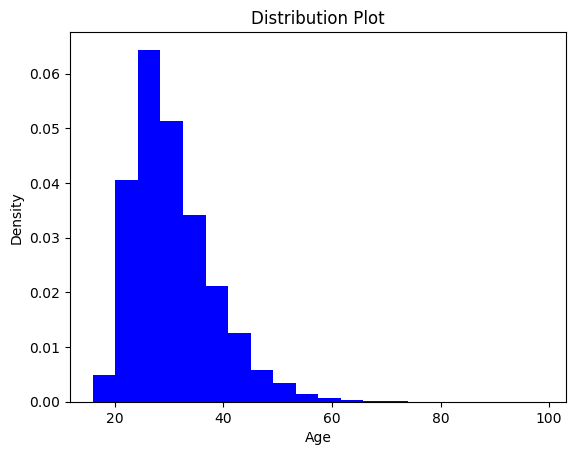

In [16]:
# your code goes here
# Create a histogram
plt.hist(df['Age'], bins=20, density=True, color='blue')

# Add a title and labels
plt.title('Distribution Plot')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


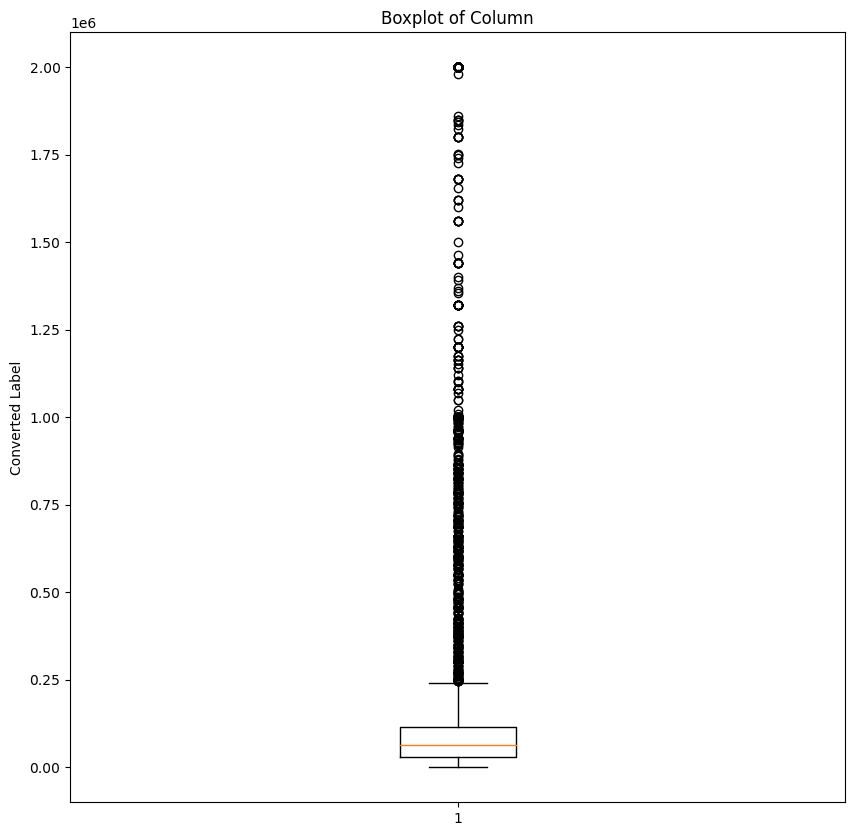

In [17]:
# your code goes here
plt.figure(figsize=(10, 10))
plt.boxplot(df['ConvertedComp'])
plt.title('Boxplot of Column')
plt.ylabel('Converted Label')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
# your code goes here
inter_quantile = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)
inter_quantile

86448.0

Find out the upper and lower bounds.


In [20]:
# your code goes here
q3 = df['ConvertedComp'].quantile(0.75)
q1 = df['ConvertedComp'].quantile(0.25)
upper_bound = q3 + 1.5 * inter_quantile
lower_bound = q1 - 1.5 * inter_quantile
print(upper_bound, lower_bound)

245136.0 -100656.0


Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
# your code goes here

# Find outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]
num_outliers

811

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [30]:
# your code goes here
cleaned_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
cleaned_df.median()
cleaned_df['ConvertedComp'].mean()

<ipython-input-30-56426a402551>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_df.median()


66462.39312380286

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [28]:
# your code goes here
df['Age'].median()

29.0

In [32]:
df['ConvertedComp'].median()

57745.0

In [36]:
inter_quantile = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
q1 = df['ConvertedComp'].quantile(0.25)
upper_bound = q3 + 1.5 * inter_quantile
lower_bound = q1 - 1.5 * inter_quantile
cleaned_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
cleaned_df['ConvertedComp'].median()
cleaned_df['ConvertedComp'].mean()

59883.20838915799

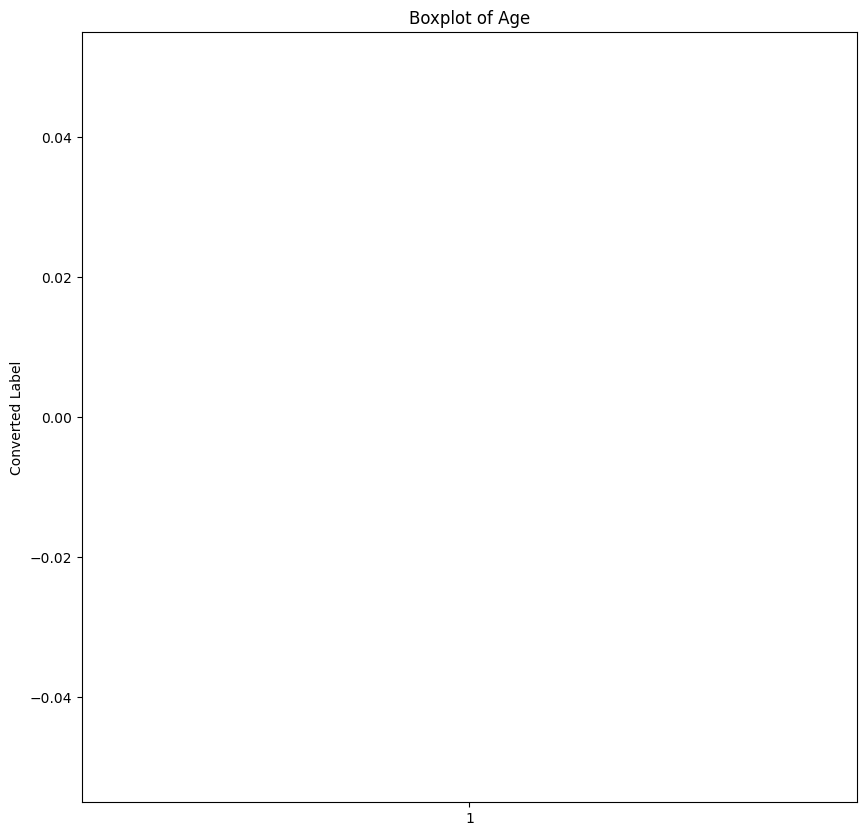

In [35]:
plt.figure(figsize=(10, 10))
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Converted Label')
plt.show()

In [37]:
df.corr()

<ipython-input-37-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
